<a href="https://colab.research.google.com/github/eueid/pythonPlayground/blob/main/Classes_avancadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando pyhton para
* Criar enumerações
* Personalizar representações de string e byte de objetos
* Definindo atributos
* Controle como objetos são comparados logicamente

In [ ]:
from enum import Enum, auto

In [ ]:
class Fruta(Enum):
  UVA = 1 # Constantes
  BANANA = 2
  LARANJA = 3
  TOMATE = 4
  PERA = auto()

# Objetos enum possuem valores e tipos de fácil leitura
print(Fruta.UVA)
print(type(Fruta.UVA))
print(repr(Fruta.UVA))

Fruta.UVA
<enum 'Fruta'>
<Fruta.UVA: 1>


In [ ]:
# Objetos enum possuem propriedades "name" (nome) e "value" (valor)
print(Fruta.UVA.name, Fruta.UVA.value)


UVA 1


In [ ]:
# Valor gerado pelo auto
print(Fruta.PERA.value)

5


In [ ]:
# Usando como objetos como chaves
frutas= dict()
frutas[Fruta.BANANA] = "Amarelo"
print(frutas[Fruta.BANANA])

Amarelo


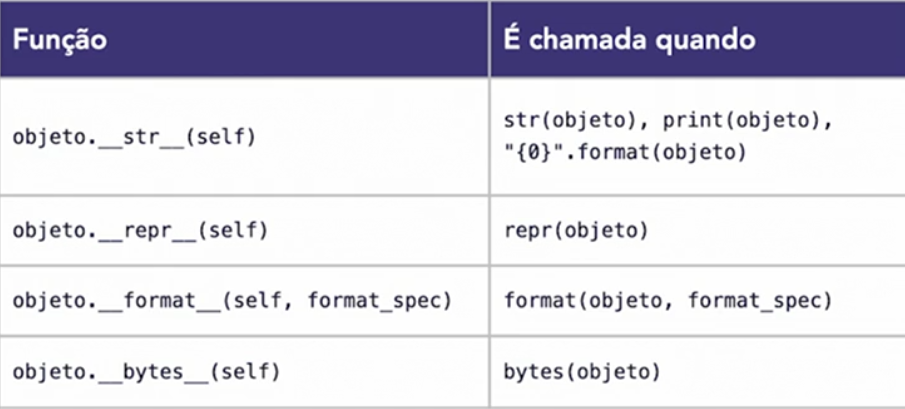

In [ ]:
class Pessoa():
  def __init__(self):
    self.nome = "Lucas"
    self.sobrenome = "Eid"
    self.idade = 21
  def __repr__(self):
    texto = "<Classe Pessoa - nome: {0}, sobrenome: {1}, idade{2}>"
    return texto.format(self.nome, self.sobrenome, self.idade)

# Use str para criar uma string amigavel para humanos
  def __str__(self):
    texto = "Pessoa {0} {1} tem {2} anos"
    return texto.format(self.nome, self.sobrenome, self.idade)

# Use bytes para converter a string em um objeto bytes
  def __bytes__(self):
    dados = [self.nome, self.sobrenome, self.idade]
    para_bytes = "Pessoa:{0}:{1}:{2}".format(*dados)
    return para_bytes.encode('utf-8')


In [ ]:
pessoa = Pessoa()
print(repr(pessoa))
print(str(pessoa))
print('Formatando: {0}'.format(pessoa))
print(bytes(pessoa))

<Classe Pessoa - nome: Lucas, sobrenome: Eid, idade21>
Pessoa Lucas Eid tem 21 anos
Formatando: Pessoa Lucas Eid tem 21 anos
b'Pessoa:Lucas:Eid:21'


**Funções de Atributos  Classes**
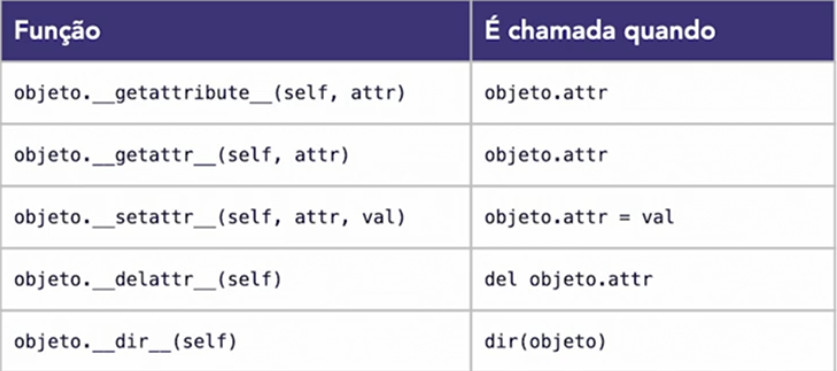

In [ ]:
class MinhasCores():
  def __init__(self):
    self.red = 50
    self.green = 75
    self.blue = 100
  
  # Usando getattr para retornar um valor de forma dinâmica
  def __getattr__(self,attr):
   if attr == "rgb":
     return (self.red, self.green, self.blue)
   else:
     raise AttributeError
  
  def __setattr__(self, attr, val):
    if attr == "rgb":
     self.red = val[0]
     self.green = val[1]
     self.blue = val[2]    
    else:
     super().__setattr__(attr, val)

  def __dir__(self):
    return ("red", "green", "blue", "rgb")

In [ ]:
cores = MinhasCores()
print(cores.rgb)

# Defina o valor do atributo
cores.rgb = (125, 200, 86)
print(cores.rgb)

# Acesso a um atributo específico
print(cores.red)

# Liste os atributos disponíveis
print(dir(cores))

**Operações com Objetos**
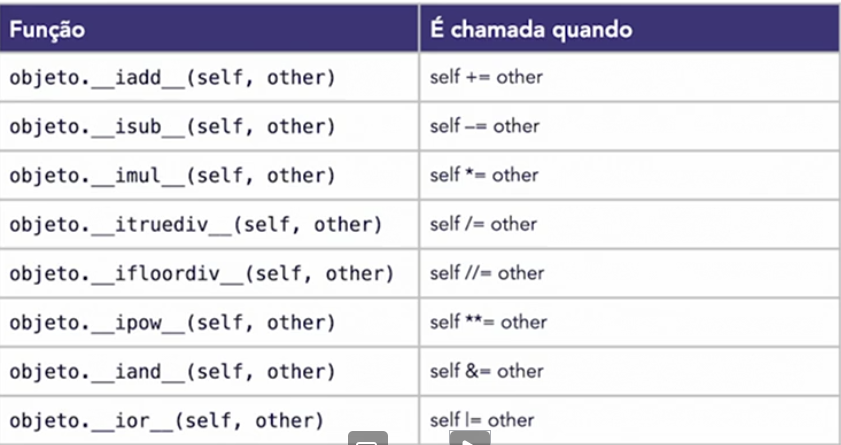

In [ ]:
class Coordenada():
  def __init__(self, x, y):
    self.x = x
    self.y = y
  
  def __repr__(self):
    return "<Coordenada x: {0}, y: {1}>".format(self.x, self.y)

  # Implementar adição e subtração
  def __add__(self, other):
    return Coordenada(self.x + other.x, self.y + other.y)

  def __sub__(self, other):
    return Coordenada(self.x - other.x, self.y - other.y)

  # Implementar adição in-place
  def __iadd__(self, other):
    self.x += other.x
    self.y += other.y
    return self

In [ ]:
# Declarando as coordenadas
c1 = Coordenada(10, 30)
c2 = Coordenada(30, 30)
print(c1, c2)

# Adicionar duas coordenadas
c3 = c1 + c2
print(c3)

# Subtrari duas coordenadas
c4 = c2 - c1
print(c4)

# Executar uma adição in-place
c1 += c2
print(c1)

**Comparando objetos**

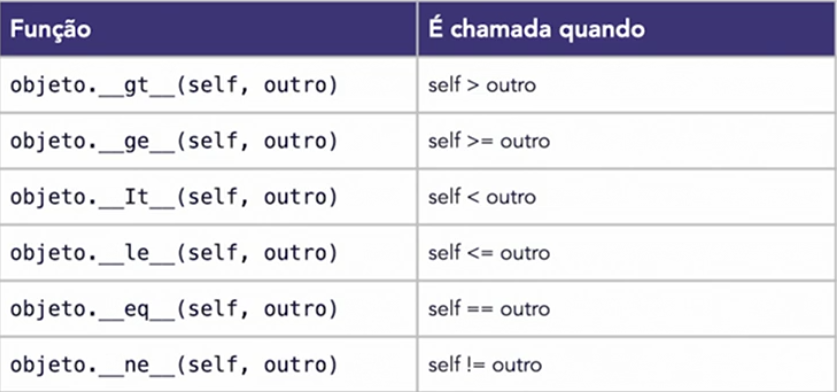

In [ ]:
class Pessoa():
    def __init__(self, nome, sobrenome, nivel, anos_trabalhados):
        self.nome = nome
        self.sobrenome = sobrenome
        self.nivel = nivel
        self.senioridade = anos_trabalhados

    # Implemente as comparações usando o nível de cada pessoa
    def __ge__(self, other):
        if self.nivel == other.nivel:
            return self.senioridade >= other.senioridade
        return self.nivel >= other.nivel

    def __gt__(self, other):
        if self.nivel == other.nivel:
            return self.senioridade > other.senioridade
        return self.nivel > other.nivel

    def __lt__(self, other):
        if self.nivel == other.nivel:
            return self.senioridade < other.senioridade
        return self.nivel < other.nivel

    def __le__(self, other):
        if self.nivel == other.nivel:
            return self.senioridade <= other.senioridade
        return self.nivel <= other.nivel

In [ ]:
dpto = []
 
dpto.append(Pessoa("Túlio", "Toledo", 5, 9))
dpto.append(Pessoa("João", "Junior", 4, 12))
dpto.append(Pessoa("Jessica", "Temporal", 6, 6))
dpto.append(Pessoa("Rebeca", "Robinson", 5, 12))
dpto.append(Pessoa("Thiago", "Tavares", 5, 12))

# Descobrindo quem é mais sênior

print(dpto[0] > dpto[2])
print(dpto[4] < dpto[3])

In [ ]:
# Ordenar pessoas por senioridade
pessoas = sorted(dpto)
for pessoa in pessoas:
  print(pessoa.nome)